In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.chdir("C:/Users/fahad/OneDrive/Desktop/UT ARLINGTON/3rd SEM - SUMMER/DATA SCIENCEPROG APPROACH/Assignments/ML Homework/Classification/")

In [3]:
bank_df = pd.read_csv("bank-additional-full.csv")

In [4]:
bank = bank_df.copy()

In [5]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
bank.describe

<bound method NDFrame.describe of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact 

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
bank = bank.replace('unknown', "")
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
bank['job'] = bank['job'].map({"admin.":0, "blue-collar":1, "entrepreneur":2, "housemaid":3, "management":4, "retired":5, "self-employed":6, "services":7, "student":8, "technician":9, "unemployed":10})
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7.0,married,high.school,,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7.0,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0.0,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7.0,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.0,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,1.0,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,5.0,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,9.0,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [11]:
bank['education'] = bank['education'].map({"basic.4y":0, "basic.6y":1, "basic.9y":2, "high.school":3, "illiterate":4, "professional.course":5, "university.degree":6})
bank['default'] = bank['default'].map({"no":0})
bank['housing'] = bank['housing'].map({"no":0, "yes":1})
bank['loan'] = bank['loan'].map({"no":0, "yes":1})
bank['y'] = bank['y'].map({"no":0, "yes":1})
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,married,0.0,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7.0,married,3.0,NaN,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7.0,married,3.0,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.0,married,1.0,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7.0,married,3.0,0.0,0.0,1.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.0,married,5.0,0.0,1.0,0.0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1.0,married,5.0,0.0,0.0,0.0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5.0,married,6.0,0.0,1.0,0.0,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9.0,married,5.0,0.0,0.0,0.0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bank['month'] = encoder.fit_transform(bank['month'])
bank['day_of_week'] = encoder.fit_transform(bank['day_of_week'])
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,married,0.0,0.0,0.0,0.0,telephone,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7.0,married,3.0,NaN,0.0,0.0,telephone,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7.0,married,3.0,0.0,1.0,0.0,telephone,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.0,married,1.0,0.0,0.0,0.0,telephone,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7.0,married,3.0,0.0,0.0,1.0,telephone,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.0,married,5.0,0.0,1.0,0.0,cellular,7,0,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1.0,married,5.0,0.0,0.0,0.0,cellular,7,0,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5.0,married,6.0,0.0,1.0,0.0,cellular,7,0,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9.0,married,5.0,0.0,0.0,0.0,cellular,7,0,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [13]:
bank = pd.get_dummies(bank, columns=['marital', 'contact', 'poutcome'], drop_first=True)
bank

,age,job,education,default,housing,loan,month,day_of_week,duration,campaign,...,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,3.0,0.0,0.0,0.0,0.0,6,1,261,1,...,-36.4,4.857,5191.0,0,0,1,0,1,1,0
1,57,7.0,3.0,NaN,0.0,0.0,6,1,149,1,...,-36.4,4.857,5191.0,0,0,1,0,1,1,0
2,37,7.0,3.0,0.0,1.0,0.0,6,1,226,1,...,-36.4,4.857,5191.0,0,0,1,0,1,1,0
3,40,0.0,1.0,0.0,0.0,0.0,6,1,151,1,...,-36.4,4.857,5191.0,0,0,1,0,1,1,0
4,56,7.0,3.0,0.0,0.0,1.0,6,1,307,1,...,-36.4,4.857,5191.0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.0,5.0,0.0,1.0,0.0,7,0,334,1,...,-50.8,1.028,4963.6,1,0,1,0,0,1,0
41184,46,1.0,5.0,0.0,0.0,0.0,7,0,383,1,...,-50.8,1.028,4963.6,0,0,1,0,0,1,0
41185,56,5.0,6.0,0.0,1.0,0.0,7,0,189,2,...,-50.8,1.028,4963.6,0,0,1,0,0,1,0
41186,44,9.0,5.0,0.0,0.0,0.0,7,0,442,1,...,-50.8,1.028,4963.6,1,0,1,0,0,1,0


In [14]:
bank.isnull().sum()

age                        0
job                      330
education               1731
default                 8600
housing                  990
loan                     990
month                      0
day_of_week                0
duration                   0
campaign                   0
pdays                      0
previous                   0
emp.var.rate               0
cons.price.idx             0
cons.conf.idx              0
euribor3m                  0
nr.employed                0
y                          0
marital_divorced           0
marital_married            0
marital_single             0
contact_telephone          0
poutcome_nonexistent       0
poutcome_success           0
dtype: int64

In [15]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   job                   40858 non-null  float64
 2   education             39457 non-null  float64
 3   default               32588 non-null  float64
 4   housing               40198 non-null  float64
 5   loan                  40198 non-null  float64
 6   month                 41188 non-null  int32  
 7   day_of_week           41188 non-null  int32  
 8   duration              41188 non-null  int64  
 9   campaign              41188 non-null  int64  
 10  pdays                 41188 non-null  int64  
 11  previous              41188 non-null  int64  
 12  emp.var.rate          41188 non-null  float64
 13  cons.price.idx        41188 non-null  float64
 14  cons.conf.idx         41188 non-null  float64
 15  euribor3m          

In [16]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
bank = imputer.fit_transform(bank)
bank

array([[56.,  3.,  0., ...,  1.,  1.,  0.],
       [57.,  7.,  3., ...,  1.,  1.,  0.],
       [37.,  7.,  3., ...,  1.,  1.,  0.],
       ...,
       [56.,  5.,  6., ...,  0.,  1.,  0.],
       [44.,  9.,  5., ...,  0.,  1.,  0.],
       [74.,  5.,  5., ...,  0.,  0.,  0.]])

In [17]:
type(bank)

numpy.ndarray

In [18]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(bank)
bank = scaler.transform(bank)
bank

array([[ 1.53303429, -0.18774888, -1.7622669 , ...,  1.31826996,
         0.39770593, -0.1857    ],
       [ 1.62899323,  0.94296384, -0.29144953, ...,  1.31826996,
         0.39770593, -0.1857    ],
       [-0.29018564,  0.94296384, -0.29144953, ...,  1.31826996,
         0.39770593, -0.1857    ],
       ...,
       [ 1.53303429,  0.37760748,  1.17936785, ..., -0.75856997,
         0.39770593, -0.1857    ],
       [ 0.38152696,  1.5083202 ,  0.68909539, ..., -0.75856997,
         0.39770593, -0.1857    ],
       [ 3.26029527,  0.37760748,  0.68909539, ..., -0.75856997,
        -2.51442063, -0.1857    ]])

In [19]:
bank = pd.DataFrame(bank, columns=['age', 'job', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'marital_divorced', 'marital_married', 'marital_single', 'contact_telephone', 'poutcome_nonexistent', 'poutcome_success'])

In [20]:
bank

,age,job,education,default,housing,loan,month,day_of_week,duration,campaign,...,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,contact_telephone,poutcome_nonexistent,poutcome_success
0,1.533034,-0.187749,-1.762267,0.0,-1.086243,-0.433588,0.762558,-0.718834,0.010471,-0.565922,...,0.886447,0.712460,0.331680,-0.356309,-0.355097,0.807638,-0.624938,1.31827,0.397706,-0.1857
1,1.628993,0.942964,-0.291450,0.0,-1.086243,-0.433588,0.762558,-0.718834,-0.421501,-0.565922,...,0.886447,0.712460,0.331680,-0.356309,-0.355097,0.807638,-0.624938,1.31827,0.397706,-0.1857
2,-0.290186,0.942964,-0.291450,0.0,0.938566,-0.433588,0.762558,-0.718834,-0.124520,-0.565922,...,0.886447,0.712460,0.331680,-0.356309,-0.355097,0.807638,-0.624938,1.31827,0.397706,-0.1857
3,-0.002309,-1.035783,-1.271994,0.0,-1.086243,-0.433588,0.762558,-0.718834,-0.413787,-0.565922,...,0.886447,0.712460,0.331680,-0.356309,-0.355097,0.807638,-0.624938,1.31827,0.397706,-0.1857
4,1.533034,0.942964,-0.291450,0.0,-1.086243,2.353340,0.762558,-0.718834,0.187888,-0.565922,...,0.886447,0.712460,0.331680,-0.356309,-0.355097,0.807638,-0.624938,1.31827,0.397706,-0.1857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.377607,0.689095,0.0,0.938566,-0.433588,1.193593,-1.434368,0.292025,-0.565922,...,-2.224953,-1.495186,-2.815697,2.806550,-0.355097,0.807638,-0.624938,-0.75857,0.397706,-0.1857
41184,0.573445,-0.753105,0.689095,0.0,-1.086243,-0.433588,1.193593,-1.434368,0.481012,-0.565922,...,-2.224953,-1.495186,-2.815697,-0.356309,-0.355097,0.807638,-0.624938,-0.75857,0.397706,-0.1857
41185,1.533034,0.377607,1.179368,0.0,0.938566,-0.433588,1.193593,-1.434368,-0.267225,-0.204909,...,-2.224953,-1.495186,-2.815697,-0.356309,-0.355097,0.807638,-0.624938,-0.75857,0.397706,-0.1857
41186,0.381527,1.508320,0.689095,0.0,-1.086243,-0.433588,1.193593,-1.434368,0.708569,-0.565922,...,-2.224953,-1.495186,-2.815697,2.806550,-0.355097,0.807638,-0.624938,-0.75857,0.397706,-0.1857


In [21]:
y = (pd.get_dummies(bank['y'], columns = ['y'], prefix = 'y', drop_first = True)).values
type(y)
y[:5]
y = np.ravel(y)
y[:4]

array([0, 0, 0, 0], dtype=uint8)

In [22]:
bank.drop(columns=['y'],inplace=True)
bank.head()

,age,job,education,default,housing,loan,month,day_of_week,duration,campaign,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_divorced,marital_married,marital_single,contact_telephone,poutcome_nonexistent,poutcome_success
0,1.533034,-0.187749,-1.762267,0.0,-1.086243,-0.433588,0.762558,-0.718834,0.010471,-0.565922,...,0.722722,0.886447,0.71246,0.33168,-0.355097,0.807638,-0.624938,1.31827,0.397706,-0.1857
1,1.628993,0.942964,-0.291450,0.0,-1.086243,-0.433588,0.762558,-0.718834,-0.421501,-0.565922,...,0.722722,0.886447,0.71246,0.33168,-0.355097,0.807638,-0.624938,1.31827,0.397706,-0.1857
2,-0.290186,0.942964,-0.291450,0.0,0.938566,-0.433588,0.762558,-0.718834,-0.124520,-0.565922,...,0.722722,0.886447,0.71246,0.33168,-0.355097,0.807638,-0.624938,1.31827,0.397706,-0.1857
3,-0.002309,-1.035783,-1.271994,0.0,-1.086243,-0.433588,0.762558,-0.718834,-0.413787,-0.565922,...,0.722722,0.886447,0.71246,0.33168,-0.355097,0.807638,-0.624938,1.31827,0.397706,-0.1857
4,1.533034,0.942964,-0.291450,0.0,-1.086243,2.353340,0.762558,-0.718834,0.187888,-0.565922,...,0.722722,0.886447,0.71246,0.33168,-0.355097,0.807638,-0.624938,1.31827,0.397706,-0.1857


In [23]:
bank.dtypes

age                     float64
job                     float64
education               float64
default                 float64
housing                 float64
loan                    float64
month                   float64
day_of_week             float64
duration                float64
campaign                float64
pdays                   float64
previous                float64
emp.var.rate            float64
cons.price.idx          float64
cons.conf.idx           float64
euribor3m               float64
nr.employed             float64
marital_divorced        float64
marital_married         float64
marital_single          float64
contact_telephone       float64
poutcome_nonexistent    float64
poutcome_success        float64
dtype: object

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(bank,y,test_size=0.3,random_state=42)

In [25]:
print('Shape of Training set : ' , [X_train.shape,y_train.shape])
print('Shape of Validation set : ' , [X_valid.shape,y_valid.shape])

Shape of Training set :  [(28831, 23), (28831,)]
Shape of Validation set :  [(12357, 23), (12357,)]


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve
plt.style.use('seaborn-colorblind')
from sklearn.metrics import f1_score

In [27]:
log_clf = LogisticRegression().fit(X_train,y_train)

log_pred = log_clf.predict(X_valid)

print('Training score : ' , log_clf.score(X_train,y_train))
Training_score_log = log_clf.score(X_train,y_train)
 
print('Validation score : ' , round(log_clf.score(X_valid,y_valid),2))
Validation_score_log = log_clf.score(X_valid,y_valid)

print("Accuracy:",accuracy_score(y_valid, log_pred))
Accuracy_log = accuracy_score(y_valid, log_pred)

print("Precision:",precision_score(y_valid, log_pred))
Precision_log = precision_score(y_valid, log_pred)

print("Recall:",recall_score(y_valid, log_pred))
Recall_log = recall_score(y_valid, log_pred)

print("F1 Score:", f1_score(y_valid, log_pred, average='micro'))
F1_Score_log = f1_score(y_valid, log_pred, average='micro')

Training score :  0.9104436197148902
Validation score :  0.91
Accuracy: 0.9106579266812334
Precision: 0.6678445229681979
Recall: 0.408207343412527
F1 Score: 0.9106579266812334


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix_log = confusion_matrix(y_valid,log_pred)
confusion_matrix_log

array([[10686,   282],
       [  822,   567]], dtype=int64)

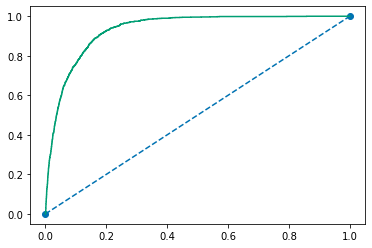

In [29]:
%matplotlib inline
y_pred_proba  = log_clf.predict_proba(X_valid)[::,1]
FPR,TPR,threshold = roc_curve(y_valid,y_pred_proba)
auc_log = roc_auc_score(y_valid,y_pred_proba)
plt.plot([0,1],[0,1],'o--');
plt.plot(FPR,TPR,label='data 1, auc='+str(auc_log));
plt.show()

In [30]:
knn_clf = KNeighborsClassifier(n_neighbors=20).fit(X_train,y_train)

knn_pred = knn_clf.predict(X_valid)

print('Training score : ' , knn_clf.score(X_train,y_train))
Training_score_knn = knn_clf.score(X_train,y_train)

print('Validation score : ' ,(knn_clf.score(X_valid,y_valid)))
Validation_score_knn = knn_clf.score(X_valid,y_valid)

print("Accuracy:",accuracy_score(y_valid, knn_pred))
Accuracy_knn = accuracy_score(y_valid, knn_pred)

print("Precision:",precision_score(y_valid, knn_pred))
Precision_knn = precision_score(y_valid, knn_pred)

print("Recall:",recall_score(y_valid, knn_pred))
Recall_knn = recall_score(y_valid, knn_pred)

print("F1 Score:", f1_score(y_valid, knn_pred, average='micro'))
F1_Score_knn = f1_score(y_valid, knn_pred, average='micro')

Training score :  0.9094030730810586
Validation score :  0.9021607186210245
Accuracy: 0.9021607186210245
Precision: 0.6415094339622641
Recall: 0.2937365010799136
F1 Score: 0.9021607186210245


In [31]:
confusion_matrix_knn = confusion_matrix(y_valid,knn_pred)
confusion_matrix_knn

array([[10740,   228],
       [  981,   408]], dtype=int64)

In [32]:
y_pred_proba  = knn_clf.predict_proba(X_valid)[::,1]
auc_knn = roc_auc_score(y_valid,y_pred_proba)

In [33]:
tree_clf = DecisionTreeClassifier().fit(X_train,y_train)

tree_pred = tree_clf.predict(X_valid)

print('Training score : ' , tree_clf.score(X_train,y_train))
Training_score_tree = tree_clf.score(X_train,y_train)

print('Validation score : ' ,(tree_clf.score(X_valid,y_valid)))
Validation_score_tree = tree_clf.score(X_valid,y_valid)

print("Accuracy:",accuracy_score(y_valid, tree_pred))
Accuracy_tree = accuracy_score(y_valid, tree_pred)

print("Precision:",precision_score(y_valid, tree_pred))
Precision_tree = precision_score(y_valid, tree_pred)

print("Recall:",recall_score(y_valid, tree_pred))
Recall_tree = recall_score(y_valid, tree_pred)

print("F1 Score:", f1_score(y_valid, tree_pred, average='micro'))
F1_Score_tree = f1_score(y_valid, tree_pred, average='micro')

y_pred_proba  = tree_clf.predict_proba(X_valid)[::,1]
auc_tree = roc_auc_score(y_valid,y_pred_proba)

Training score :  1.0
Validation score :  0.8892125920530873
Accuracy: 0.8892125920530873
Precision: 0.5068027210884354
Recall: 0.5363570914326854
F1 Score: 0.8892125920530873


In [34]:
confusion_matrix_tree = confusion_matrix(y_valid,tree_pred)
confusion_matrix_tree

array([[10243,   725],
       [  644,   745]], dtype=int64)

In [35]:
rf_clf = RandomForestClassifier().fit(X_train,y_train)

rf_pred = rf_clf.predict(X_valid)

print('Training score : ' , rf_clf.score(X_train,y_train))
Training_score_rf = rf_clf.score(X_train,y_train)

print('Validation score : ' ,(rf_clf.score(X_valid,y_valid)))
Validation_score_rf = rf_clf.score(X_valid,y_valid)

print("Accuracy:",accuracy_score(y_valid, rf_pred))
Accuracy_rf = accuracy_score(y_valid, rf_pred)

print("Precision:",precision_score(y_valid, rf_pred))
Precision_rf = precision_score(y_valid, rf_pred)

print("Recall:",recall_score(y_valid, rf_pred))
Recall_rf = recall_score(y_valid, rf_pred)

print("F1 Score:", f1_score(y_valid, rf_pred, average='micro'))
F1_Score_rf = f1_score(y_valid, rf_pred, average='micro')

y_pred_proba  = rf_clf.predict_proba(X_valid)[::,1]
auc_rf = roc_auc_score(y_valid,y_pred_proba)

Training score :  1.0
Validation score :  0.9141377356963665
Accuracy: 0.9141377356963665
Precision: 0.655893536121673
Recall: 0.49676025917926564
F1 Score: 0.9141377356963665


In [36]:
confusion_matrix_rf = confusion_matrix(y_valid,rf_pred)
confusion_matrix_rf

array([[10606,   362],
       [  699,   690]], dtype=int64)

In [37]:
import xgboost
from xgboost import XGBClassifier

xg_clf = XGBClassifier().fit(X_train,y_train)

xg_pred = xg_clf.predict(X_valid)

print('Training score : ' , xg_clf.score(X_train,y_train))
Training_score_xg = xg_clf.score(X_train,y_train)

print('Validation score : ' ,(xg_clf.score(X_valid,y_valid)))
Validation_score_xg = xg_clf.score(X_valid,y_valid)

print("Accuracy:",accuracy_score(y_valid, xg_pred))
Accuracy_xg = accuracy_score(y_valid, xg_pred)

print("Precision:",precision_score(y_valid, xg_pred))
Precision_xg = precision_score(y_valid, xg_pred)

print("Recall:",recall_score(y_valid, xg_pred))
Recall_xg = recall_score(y_valid, xg_pred)

print("F1 Score:", f1_score(y_valid, xg_pred, average='micro'))
F1_Score_xg = f1_score(y_valid, xg_pred, average='micro')

y_pred_proba  = xg_clf.predict_proba(X_valid)[::,1]
auc_xg = roc_auc_score(y_valid,y_pred_proba)

Training score :  0.9641358260206028
Validation score :  0.9151088451889617
Accuracy: 0.9151088451889617
Precision: 0.646804835924007
Recall: 0.5392368610511159
F1 Score: 0.9151088451889617


In [38]:
confusion_matrix_xg = confusion_matrix(y_valid,xg_pred)
confusion_matrix_xg

array([[10559,   409],
       [  640,   749]], dtype=int64)

In [39]:
#lets create a dataframe
Models= pd.DataFrame({'Training_Score':[Training_score_log,Training_score_knn,Training_score_tree,Training_score_rf, Training_score_xg]
,'Validation_score' : [Validation_score_log,Validation_score_knn,Validation_score_tree,Validation_score_rf, Validation_score_xg]
,'Accuracy' : [Accuracy_log,Accuracy_knn,Accuracy_tree,Accuracy_rf, Accuracy_xg]
,'Precision' : [Precision_log,Precision_knn,Precision_tree,Precision_rf, Precision_xg]
,'Recall' : [Recall_log,Recall_knn,Recall_tree,Recall_rf, Recall_xg]
,'F1 Score' : [F1_Score_log,F1_Score_knn,F1_Score_tree,F1_Score_rf, F1_Score_xg]                     
,'AUC' : [auc_log,auc_knn,auc_tree,auc_rf, auc_xg]},index=['Logistic Regression','KNN','Decision Tree','Random Forest', 'XGBoost'])
Models

,Training_Score,Validation_score,Accuracy,Precision,Recall,F1 Score,AUC
Logistic Regression,0.910444,0.910658,0.910658,0.667845,0.408207,0.910658,0.931543
KNN,0.909403,0.902161,0.902161,0.641509,0.293737,0.902161,0.908156
Decision Tree,1.000000,0.889213,0.889213,0.506803,0.536357,0.889213,0.735128
Random Forest,1.000000,0.914138,0.914138,0.655894,0.496760,0.914138,0.943406
XGBoost,0.964136,0.915109,0.915109,0.646805,0.539237,0.915109,0.946356
